* [Some Basics](#Some-Basics)
* [Distributions Refresher](#Distributions-Refresher)
  * [Discrete Distributions](#Discrete-Distributions)
    * [Uniform](#Uniform)
    * [Bernoulli](#Bernoulli)
    * [Binomial](#Binomial)
    * [Poisson](#Poisson)
  * [Continuous Distributions](#Continuous-Distributions)
    * [Normal](#Normal)
    * [Exponential](#Exponential)
* [First Example](#First-Example)
* [Exercises](#Exercises)

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pymc3 as pm
import math

# Some Basics

**Notation:**

* $P(A)$ - a value representing our belief in the event $A$
* $\sim A$ - *not* A
* $P(A|X)$ - our belief in the event $A$ given the evidence $X$
* $P(A,X)$ - our belief in the events $A$ and $X$ both occuring

**Basic rules:**

* $P(A)+P(\sim A)=1$
* $P(A,X)=P(A|X) \times P(X)$

**Bayes theorem:**

The basic formula behind Bayes Theorem is fairly simple and easy to derive using the above basics. It isn't specific to Bayes Theorem but provides a convenient way of combining probabilities that we either know, can calculate using *a priori* knowledge, or estimate based on current beliefs, into a probability distribution we can use to make inferences about the system that produced the observed data...

$P(A,X)=P(A|X) \times P(X)$

...or...

$P(X,A)=P(X|A) \times P(A)$

Clearly $P(A,X)=P(X,A)$ so...

$P(A|X) \times P(X)=P(X|A) \times P(A)$

$P(A|X) = \cfrac{P(X|A) \times P(A)}{P(X)}$

**Terminology:**

* $A$ represents a hypothesis and $X$ some observed data, so...
* $P(A|X)$ is a value which represents our belief in the hypothesis $A$ having observed some data $X$. In "Bayes-speak" this is the **posterior** which will allow us to make inferences about the system that produced the observed data.
* $P(A)$ is our belief in the hypothesis $A$ before we've considered the observed data $X$. This is the **prior**.
* $P(X|A)$ - our belief in the likelihood of observing the data $X$ if our hypothesis $A$ is true - is called the **likelihood**.

$P(X)$, our belief that we're likely to observe the data $X$ regardless of whether our hypothesis $A$ is true or not, serves the purpose of normalising the result $0 - 1$. Sometimes we don't need the normalised value and are only interested in comparing relative values of $P(A|X)$ for different hypotheses. For this reason (and because $P(X)$ can be difficult to calculate) it's sometimes omitted and written as...

$P(A|X) \propto P(X|A) \times P(A)$

...i.e.,...

$\text{posterior} \propto \text{likelihood} \times \text{prior}$

# Distributions Refresher

When you're using Bayesian methods nothing is specified as a single value - it's always a range of values with different probabilities of each. For this reason, it's important to understand some of the common probability distributions. When building a model you'll want to choose an appropriate distribution to model it's possible values & relative probabilities of each...

*(An important definition before we start: **Expected Value (EV)** is the "long-run mean" of samples from the distribution. As you take more and more samples their mean will get closer to the EV. Think of it as a "centre of mass" of the distribution.)*

## Discrete Distributions

The distribution of a discrete random variable is called a "Probability Mass Function" (or pmf).

### Uniform

A uniform distribution has $n$ possible outcomes and each are equally probable, $\frac{1}{n}$, e.g. rolling a fair dice.

**Parameters:**

* $n\to$ the number of possible outcomes.

**Probability function:**

$P(k)$, where $k = 1..n$ representing each of the $n$ possible outcomes, $=\frac{1}{n}$

**Expected value:**

$EV=\sum\limits_{k=1}^{n}{kP(k)}$

$=\cfrac{1}{n}+\cfrac{2}{n}+\cfrac{3}{n}+\cdots+\cfrac{n}{n}$

$=\cfrac{1}{n}(1+2+3+\cdots+n)$

$=\cfrac{1}{n}\times\cfrac{n(n+1)}{2}$

$=\cfrac{n+1}{2}$

**Distribution:**

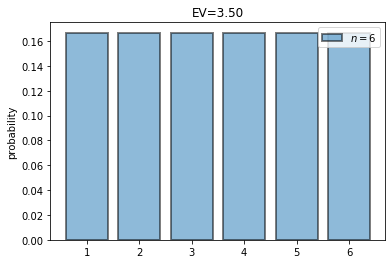

In [4]:
n=6
ks=range(1,n+1)

plt.bar(ks, stats.randint.pmf(ks, 1, n+1), label='$n=%d$' % n, alpha=0.5, edgecolor='k', lw=2)
plt.ylabel('probability')
plt.legend()
plt.title('EV=%.2f' % ((n+1)/2));

### Bernoulli

A bernoulli event has 2 possible outcomes. The outcomes can have different probabilities adding up to 1, e.g., probability of success = 0.65, probability of failure = 1 - 0.65 = 0.35.

**Parameters:**

* $p\to$ the probability of one of the outcomes. The probability of the other outcome is therefore $1-p$. By convention, it's common to assign $p$ to the "preferred" outcome (i.e., success) or the most-likely outcome.

**Probability function:**

$P(k)$, where $k$ is $0$ or $1$ representing each of the 2 possible outcomes, $=
\begin{cases}
p, & \text{if}\ k=1 \\
1-p, & \text{if}\ k=0
\end{cases}$

**Expected value:**

$EV=\sum\limits_{k=0}^{1}{kP(k)}$

$=0(1-p)+1p$

$=p$

**Distribution:**

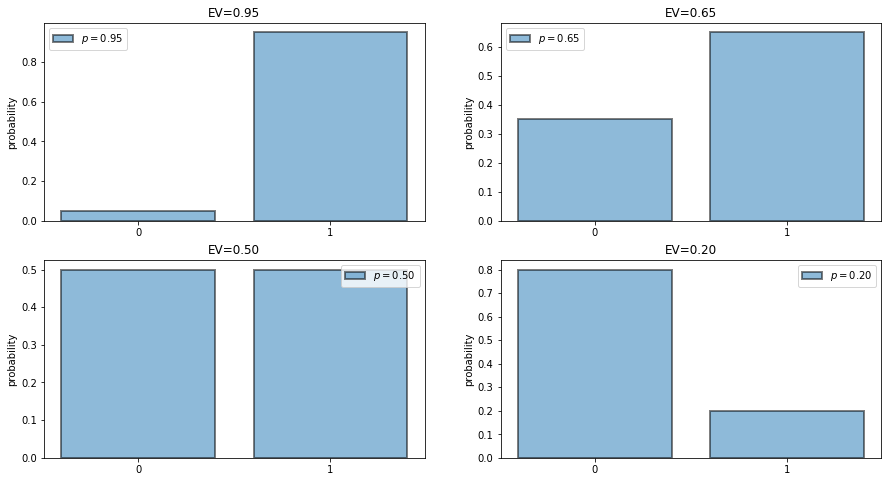

In [5]:
ps=[0.95, 0.65, 0.5, 0.2]
ks=[0,1]

plt.subplots(2, 2, figsize=(15,8))
for i, p in enumerate(ps):
    plt.subplot(2,2,i+1)

    plt.bar(ks, stats.bernoulli.pmf(ks, p), label='$p=%.2f$' % p, alpha=0.5, edgecolor='k', lw=2)
    plt.xticks(ks)
    plt.ylabel('probability')
    plt.legend()
    plt.title('EV=%.2f' % (p))

### Binomial

A binomial distribution represents many iterations, $n$, of a bernoulli event. It tells you things like "the probability of getting $k$ successes from $n$ bernoulli events each with a probability $p$ of success".

**Parameters:**

* $p\to$ the probability of one of the outcomes. The probability of the other outcome is therefore $1-p$. By convention, it's common to assign $p$ to the "preferred" outcome (i.e., success) or the most-likely outcome.
* $n \to$ the number of events

**Probability function:**

**Note:** the probability function involves working out the number of ways of getting $k$ successes in $n$ events and for this we need to know how to count "[combinations](https://en.wikipedia.org/wiki/Combination)":

${n \choose k}=\cfrac{n!}{(n-k)!k!}$.

So, $P(k)$, the probability of $k$ successes from $n$ bernoulli events each with a probability $p$ of success,  $=\cfrac{n!}{(n-k)!k!}p^k(1-p)^{n-k}$

**Expected value:**

$EV=\sum\limits_{k=0}^{n}{kP(k)}$

$=\sum\limits_{k=0}^{n}{k\cfrac{n!}{(n-k)!k!}p^k(1-p)^{n-k}}$

...[proof](https://proofwiki.org/wiki/Expectation_of_Binomial_Distribution)...

$=np$

**Distribution:**

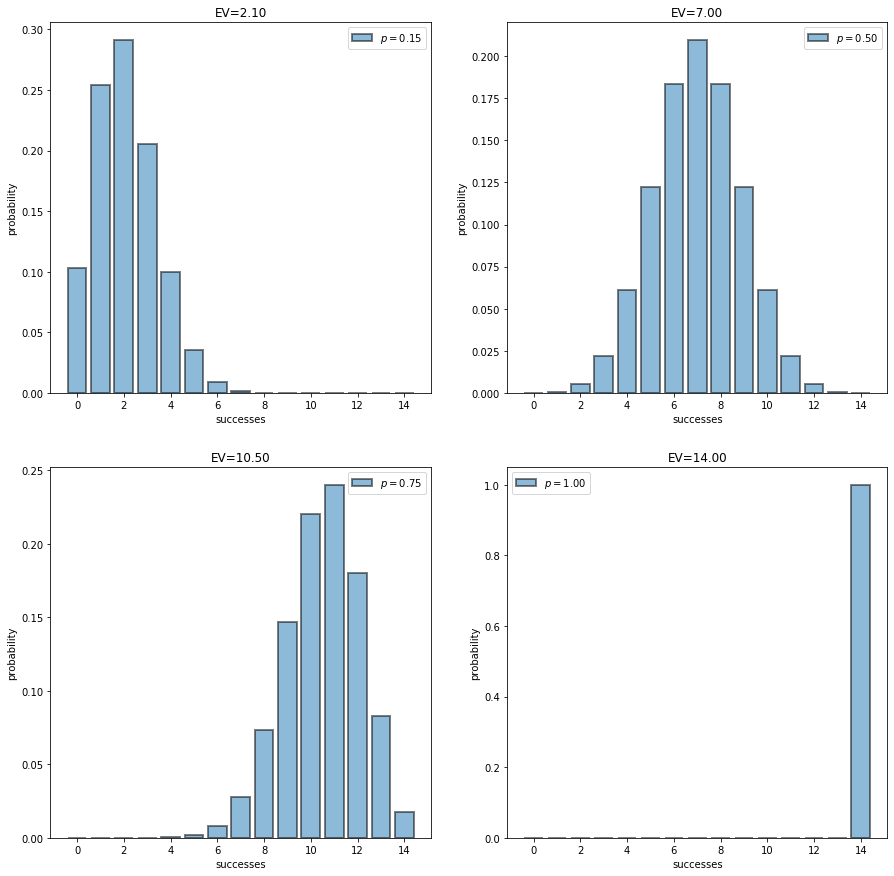

In [6]:
def n_choose_k(n, k):
    return math.factorial(n)/(math.factorial(n-k)*math.factorial(k))

n=14
ps=[0.15, 0.5, 0.75, 1]
ks=range(n+1)
Ps=[stats.binom.pmf(ks, n, p) for p in ps]
# OR: Ps=[[n_choose_k(n,k) * p**k * (1-p)**(n-k) for k in ks] for p in ps]

plt.subplots(2, 2, figsize=(15,15))
for i, p in enumerate(ps):
    plt.subplot(2,2,i+1)
    plt.xlabel('successes')
    plt.ylabel('probability')
    plt.bar(ks, Ps[i], label='$p=%.2f$' % p, alpha=0.5, edgecolor='k', lw=2)
    plt.legend()
    plt.title('EV=%.2f' % (n*p))

### Poisson

A Poisson distribution represents the probability distribution of the frequencies of an event, e.g., the probability of an event occuring $k$ times in a particular time interval. (This is just an example - the frequencies don't need to occur over a *time* interval.)

Not be confused with the Binomial distribution. They're both counting the occurences of events but a Binomial distribution has a discrete fixed number of "trials" or "attempts" each with a fixed probability of success. You can think of a Poisson distribution as having an inifinite number of "trials" or "attempts" and count the times the event does happen over the interval.

**Parameters:**

* $\lambda\to$ the "typical" or "average" number of occurrences over the interval. (Must be $\ge0$ as an event cannot occur a negative number of times.)

**Probability function:**

$P(k)$, the probability of $k$ events in the interval, $=\cfrac{\lambda^ke^{-\lambda}}{k!}$

**Expected value:**

$EV=\sum\limits_{k=0}^{\infty}{kP(k)}$

$=\sum\limits_{k=0}^{\infty}{k\cfrac{\lambda^ke^{-\lambda}}{k!}}$

...[proof](https://proofwiki.org/wiki/Expectation_of_Poisson_Distribution)...

$=\lambda$

**Distribution:**

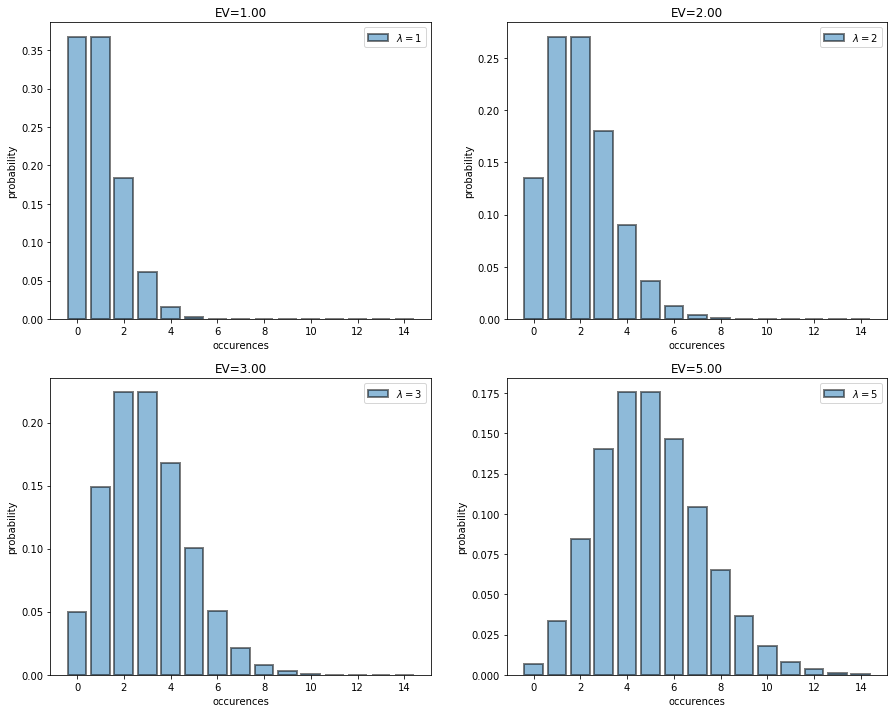

In [7]:
lambs=[1,2,3,5]
ks=range(15)
Ps=[stats.poisson.pmf(ks, l) for l in lambs]
# OR: Ps=[[(l**k * math.exp(-l))/math.factorial(k) for k in ks] for l in lambs]

plt.subplots(2, 2, figsize=(15,12))
for i, l in enumerate(lambs):
    plt.subplot(2,2,i+1)
    plt.xlabel('occurences')
    plt.ylabel('probability')
    plt.bar(ks, Ps[i], label='$\lambda=%d$' % l, alpha=0.5, edgecolor='k', lw=2)
    plt.legend()
    plt.title('EV=%.2f' % l)

## Continuous Distributions

The distribution of a continuous random variable is called a "Probability Density Function" (or pdf). Think of it as a function where you can integrate any section to get the probability that the value falls within that range (otherwise you get into [all sorts of paradoxes](https://www.youtube.com/watch?v=ZA4JkHKZM50)!)

### Normal

The normal distribution is bell-shaped, symetric around the mean where the standard deviation specifies the "spread" of the distribution with the characteristics that 68% of the data falls within 1SD, 95% within 2SD, and 99.7% within 3SD. This pattern is surprisingly common - hence the name "normal" distribution!

**Parameters:**

* $\mu\to$ the mean value (and hence the centre) of the distribution
* $\sigma\to$ the standard deviation

**Probability function:**

$P(x)=\cfrac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}$

**Expected value:**

$EV=\int{xP(x)}dx$

$=\int\limits{x\cfrac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}}dx$


...[proof](https://proofwiki.org/wiki/Expectation_of_Gaussian_Distribution)...

$=\mu$

**Distribution:**

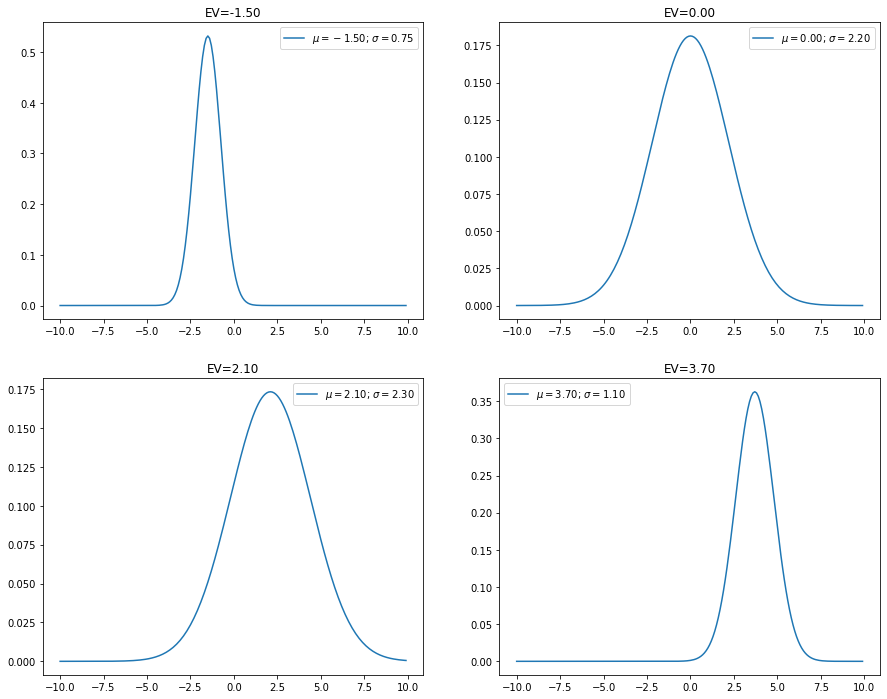

In [8]:
params=[(-1.5,0.75), (0,2.2), (2.1,2.3), (3.7,1.1)]

xs=np.arange(-10,10,0.1)
Ps=[stats.norm.pdf(xs, mu, sigma) for (mu, sigma) in params]
# OR: Ps=[[1/(sigma * math.sqrt(2*np.pi)) * math.exp(-0.5*((x-mu)/sigma)**2) for x in xs] for (mu, sigma) in params]

plt.subplots(2, 2, figsize=(15,12))
for i, (mu, sigma) in enumerate(params):
    plt.subplot(2,2,i+1)
    plt.plot(xs, Ps[i], label='$\mu=%.2f$; $\sigma=%.2f$' % (mu, sigma))
    plt.legend()
    plt.title('EV=%.2f' % mu)

### Exponential

The exponential distribution is the probability distribution of the time between events in Poisson process.

**Parameters:**

* $\lambda\to$ (like Poisson) it's the "typical" or "average" number of occurrences over the interval. (Must be $\ge0$ as an event cannot occur a negative number of times.)

**Probability function:**

$P(x)$, the probability of the time $x$ between events, $=\lambda e^{(-\lambda x)}$

**Expected value:**

$EV=\int{xP(x)}dx$

$=\int{x\lambda e^{(-\lambda x)}}dx$

...[proof](https://proofwiki.org/wiki/Expectation_of_Exponential_Distribution)...

$=\frac{1}{\lambda}$

**Distribution:**

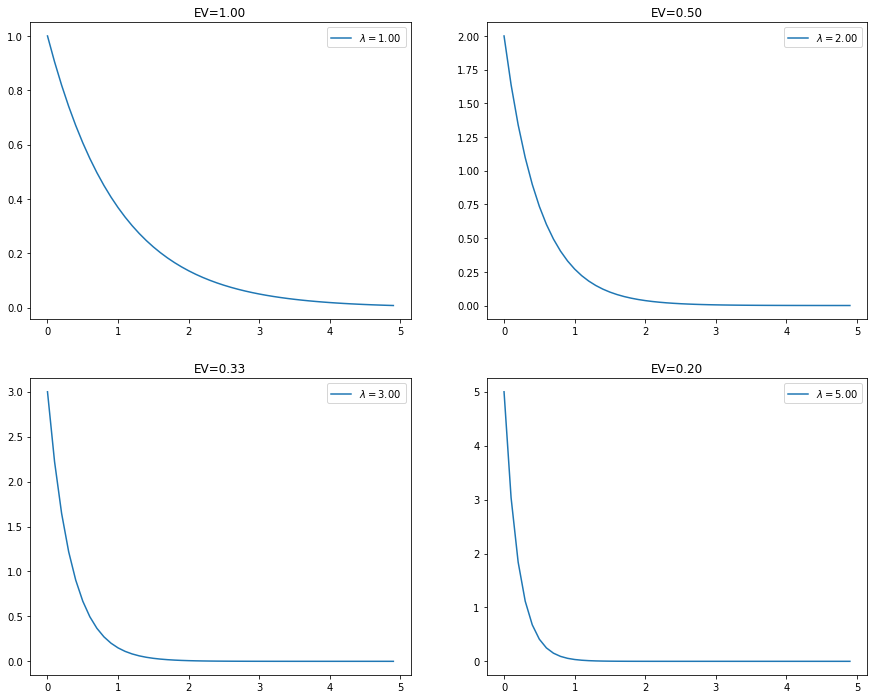

In [9]:
lambs=[1,2,3,5]

xs=np.arange(0,5,0.1)

# NOTE: In SciPy the parameterization in terms of the rate parameter, lambda, corresponds to using scale = 1 / lambda.
Ps=[stats.expon.pdf(xs, scale=1/l) for l in lambs]
# OR: Ps=[[l*math.exp(-l*x) for x in xs] for l in lambs]

plt.subplots(2, 2, figsize=(15,12))
for i, l in enumerate(lambs):
    plt.subplot(2,2,i+1)
    plt.plot(xs, Ps[i], label='$\lambda=%.2f$' % l)
    plt.legend()
    plt.title('EV=%.2f' % (1/l))

# First Example

*Given a collection of counts of daily text messages is there evidence of a change (gradual or sudden) in texting habits?*

n=74


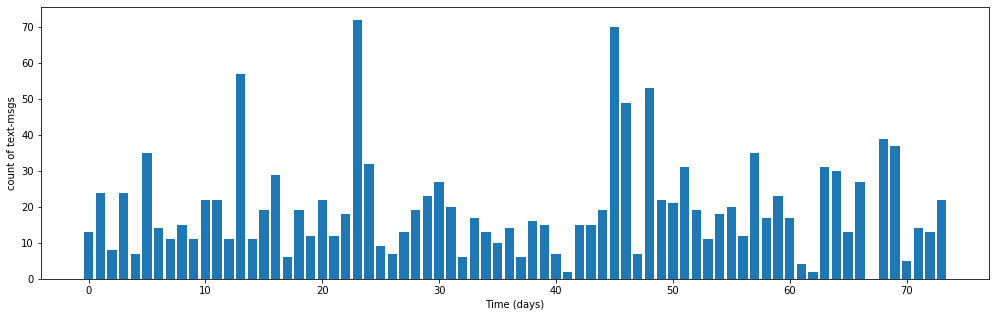

In [13]:
data=np.loadtxt('../Chapter1_Introduction/data/txtdata.csv')
n=len(data)

plt.figure(figsize=(17,5))
plt.bar(np.arange(n), data)
plt.xlabel('Time (days)')
plt.ylabel('count of text-msgs')

print('n=%d' % n)

The model, expressed formally as a statistical model:

$$n=74$$

$$C_t \sim \text{Poisson}(\lambda_t)$$

$$
\lambda_t = 
\begin{cases}
e  & \text{if } t \lt \tau \cr
l & \text{if } t \ge \tau
\end{cases}
$$

$$\tau \sim \text{DiscreteUniform}(0, n)$$
$$e \sim \text{Exponential}(r_e)$$
$$l \sim \text{Exponential}(r_l)$$

Notes about the statistical model:

* There are $n=74$ data points in our observed data
* $C_t$ is the count for day $t$. A Poisson random variable is an appropriate model for this type of counting data.
* $\lambda_t$ is the parameter for the Poisson random variable. (The "typical" or "average" number of text messages for day $t$.)
* We're hypothesising that there is a sudden change in texting habits at some point over the time period. This is day $\tau$ in our formal model.
* This gives us two different values for $\lambda_t$: $e$ is the parameter for the Poisson random variable before $\tau$, $l$ is the parameter after $\tau$.
* If the hypothesis isn't true then $e$ and $l$ should be about equal.
* We've no reason to believe the change in habits occured on any particular day so we start by assigning each day an equal probability. In other words, we use a discrete uniform probability distribution for $\tau$ over $0$ to $n$ days.
* An exponential distribution is used to model the parameters $e$ and $l$ with an initial guess for their parameters, $r_e$ and $r_l$, based on the average of our observed data.

Relating the model to the Bayesian terminology:

$P(A|X) \propto P(X|A) \times P(A)$

...or,...

$\text{posterior} \propto \text{likelihood} \times \text{prior}$

* $A$ is a hypothesis, $X$ is our observed data
* In our example, the observed data is $C_t$ and our hypothesis is: "there's a change in texting habits at day $\tau$ with $e$ representing the distribution of messages before $\tau$ and $l$ after $\tau$.
* Substituting that into the Bayes theorem give us...

$P(\tau,e,l|C_t) \propto P(C_t|\tau,e,l) \times P(\tau,e,l)$

* We've defined our *prior* distribution (i.e., what we believe about $\tau$, $e$, and $l$ without considering the observed data) by choosing appropriate distributions for each of them. What does this prior distribution look like? It doesn't matter! We can see that even with this simple example it quickly gets complicated.
* We've defined our *likelihood* distribution (i.e., the probability of $C_t$ given values for $\tau$, $e$, and $l$) as a Poisson distribution whose parameter $\lambda$ is determined based on $\tau$, $e$, and $l$.
* Our *posterior* distribution (i.e., the probability of $\tau$, $e$, and $l$ given the observed data) is what we want to infer.

Representing the model using PyMC:

*(...I'm trying not to worry too much about the PyMC syntax for now. I'm assuming there'll be more indepth discussion of this later. But the following concepts seem important to try and understand from the start.)*

* A PyMC model is defined by relating unknown variables to observed data.
* $\tau$, $e$, and $l$ (`tau`, `e` and `l` in the code below) are *Stochastic* objects. This means they're treated by the PyMC back-end as random variables. Even if we know their input parameters we still don't know their values exactly. `pm.DiscreteUniform` and `pm.Exponential` create stochastic objects with the appropriate probability distribution.
* $\lambda_t$ (`lambda_t` in the code below) is a *Deterministic* object as its value is completely determined by its input parameters.
* $C_t$ (`C_t` in the code below) is represented by combining our observed data, `data`, with our proposed model of the data-generation scheme that led to it, `lambda_t`. This tells PyMC that this is actual observed data so should stay fixed.

In [16]:
r_e = r_l = 1.0 / data.mean()

with pm.Model() as model:
    tau = pm.DiscreteUniform('tau', lower=0, upper=n)
    e = pm.Exponential('e', r_e)
    l = pm.Exponential('l', r_l)
    
    idx = np.arange(n)
    lambda_t = pm.math.switch(tau > idx, e, l)

    C_t = pm.Poisson('C_t', lambda_t, observed=data)

Next we tell pyMC to go off and characterise the posterior distribution ($P(\tau,e,l|C_t)$) using the Markov Chain Monte Carlo algorithm! (I'm not worrying too much about understanding this bit yet.)

In [17]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [l]
>Metropolis: [e]
>Metropolis: [tau]
Sampling 4 chains, 0 divergences: 100%|████████████| 60000/60000 [00:25<00:00, 2323.12draws/s]
The number of effective samples is smaller than 25% for some parameters.


You can think of the MCMC process as characterising the posterior distribution as a set of samples from it. The samples are created by updating values for $\tau$, $e$ and $l$. If the number of samples is large enough then the distributions of the values should look like their underlying distribution.

We can look at these values using the `trace` object & start to make some inferences...

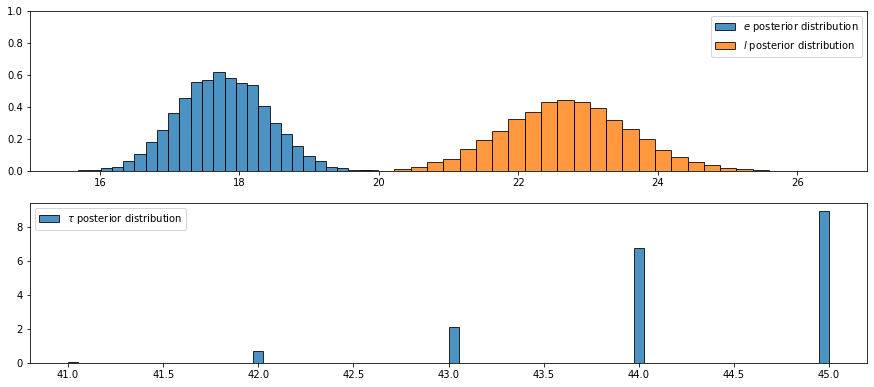

In [18]:
e_samples = trace['e']
l_samples = trace['l']
tau_samples = trace['tau']

min_l, max_l = (min(min(e_samples), min(l_samples)), max(max(e_samples), max(l_samples)))

plt.subplots(nrows=2, ncols=1, figsize=(15,10))

plt.subplot(3,1,1)
plt.hist(e_samples, bins=30, density=True, edgecolor='k', alpha=0.8, label=r'$e$ posterior distribution')
plt.legend()
plt.xlim([math.floor(min_l), math.ceil(max_l)])
plt.ylim([0,1])

plt.hist(l_samples, bins=30, density=True, edgecolor='k', alpha=0.8, label=r'$l$ posterior distribution')
plt.legend()
plt.xlim([math.floor(min_l), math.ceil(max_l)])
plt.ylim([0,1])

plt.subplot(3,1,2)
plt.hist(tau_samples, bins=n, density=True, edgecolor='k', alpha=0.8, label=r'$\tau$ posterior distribution')
plt.legend();

From this we can see that...

* $e$ and $l$ seem to be two distinct distributions so infer that there was a change in texting behaviour over this time period.
* Plausible values seem to be around $18$ for the typical number of texts before the change and around $23$ after the change - but the distributions also tell us something of our uncertainty in these values (by the spread of the distributions).
* Only a few days (around 42-45) seem to make sense as potential transition points - suggesting the change in behaviour is sudden rather than gradual!

Because $C_t$ is a Poisson variable we can estimate it's expected value at each day by taking the average of the appropriate $e$ and $l$ samples...

(For each day, find the `e_samples` where the day is before $\tau$ and the `l_samples` where the day is after $\tau$ and use their average as the expected value on that day)

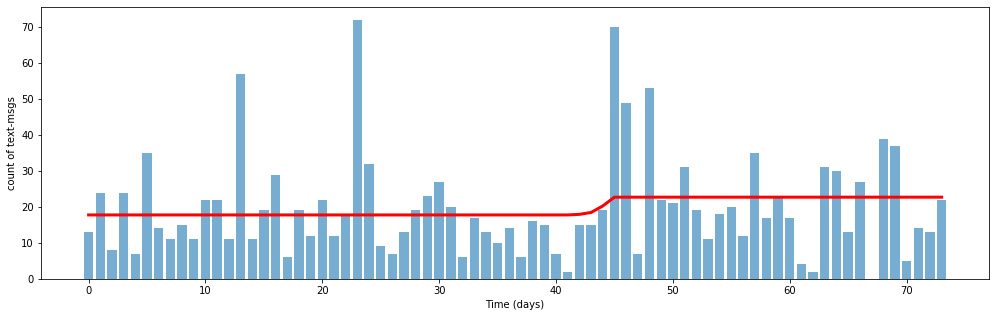

In [19]:
N = tau_samples.shape[0]

expected=[]
for i in range(n):
    before_tau_indexes = i < tau_samples
    expected_i = (e_samples[before_tau_indexes].sum() + l_samples[~before_tau_indexes].sum())/N
    expected.append(expected_i)

plt.figure(figsize=(17,5))
plt.plot(range(n), expected, color='r', lw=3)
plt.bar(range(n), data, alpha=0.6)
plt.xlabel('Time (days)')
plt.ylabel('count of text-msgs');

# Exercises

1\.  Using `e_samples` and `l_samples`, what is the mean of the posterior distributions of $e$ and $l$?

In [13]:
print(e_samples.mean())
print(l_samples.mean())

17.757523995286277
22.725163953884522


2\.  What is the expected percentage increase in text-message rates? `hint:` compute the mean of `e_samples/l_samples`. Note that this quantity is very different from `e_samples.mean()/l_samples.mean()`.

In [15]:
(e_samples/l_samples).mean()

0.7825932545806884

3\. What is the mean of $e$ **given** that we know $\tau$ is less than 45.  That is, suppose we have been given new information that the change in behaviour occurred prior to day 45. What is the expected value of $e$ now? (You do not need to redo the PyMC3 part. Just consider all instances where `tau_samples < 45`.)

In [19]:
e_samples[tau_samples < 45].mean()

17.75265228517792